<a href="https://colab.research.google.com/github/utkarsh421/utkarsh-project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Project By**         - Utkarsh Kumar



# **Project Summary -**





This project looks at hotel bookings, especially focusing on cancellations and the reasons behind them. It also suggests ways hotels can reduce cancellations and increase their income.

The data we are analyzing includes information from a city hotel and a resort hotel. It has important details like when the booking was made, how long the stay was, and how many adults and children were included in the booking. This project will go through steps to explore the data and create visual representations to help us understand it better.

The main goal of this analysis is to study the given dataset closely. Based on this study, we will suggest ways hotels can lower cancellation rates and earn more money. For example, hotels could offer discounts for customers who book early or for those who stay longer. They might also provide added perks like free parking or breakfast for guests who book directly with them instead of through third-party websites.

The EDA is divided into several steps. The first step involves exploring and examining the raw data to get a sense of what it contains. The second step deals with cleaning the data by fixing problems like missing values and removing any unnecessary information.

This EDA includes three types of analysis:

Univariate Analysis: This looks at one variable at a time to understand its distribution and characteristics.

Bivariate Analysis: In this part, we compare two variables to see how they relate to each other.

Multivariate Analysis: This looks at more than two variables at once to identify complex relationships within the data.

# **GitHub Link -**

https://github.com/utkarsh421/utkarsh-project

# **Problem Statement**


Imagine being able to predict with certainty the most popular time of year to book a hotel room, or the ideal length of stay to snag the best daily rate. Or, picture yourself being able to forecast whether a hotel is likely to receive a surge in special requests. Sounds like a hotelier's dream come true! But, what if you had a dataset that could help you unlock these secrets?

We're about to dive into a treasure trove of hotel booking information, featuring bookings for a city hotel and a resort hotel. Our dataset offers a fascinating glimpse into the world of hotel bookings, complete with details such as:

When bookings were made (peak season, off-season, or somewhere in between)
The length of stay (short and sweet, or a prolonged vacation)
The number of guests (a solo traveler, a family of four, or a group of friends)
Special requests (requests for cribs, extra beds, or other amenities)
And much, much more

#### **Define Your Business Objective?**

The objective of this project is to uncover valuable insights into customer behavior when making hotel reservations. Demand may vary across different customer segments, complicating the forecasting process, as distinct models may be necessary for each segment. These insights can help hotels refine their customer strategies and better prepare for unforeseen circumstances.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [56]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [57]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
df = pd.read_csv('/content/drive/MyDrive/Hotel Bookings  (1).csv')

### Dataset First View

In [59]:
# Dataset First Look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [60]:
# Dataset Rows & Columns count
rows,columns = df.shape
print(f'Total number of rows: {rows}')
print(f'Total number of columns: {columns}')


Total number of rows: 119390
Total number of columns: 32


#### Duplicate Values

In [61]:
# Dataset Duplicate Value Count
df.duplicated().sum()

31994

#### Missing Values/Null Values

In [62]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


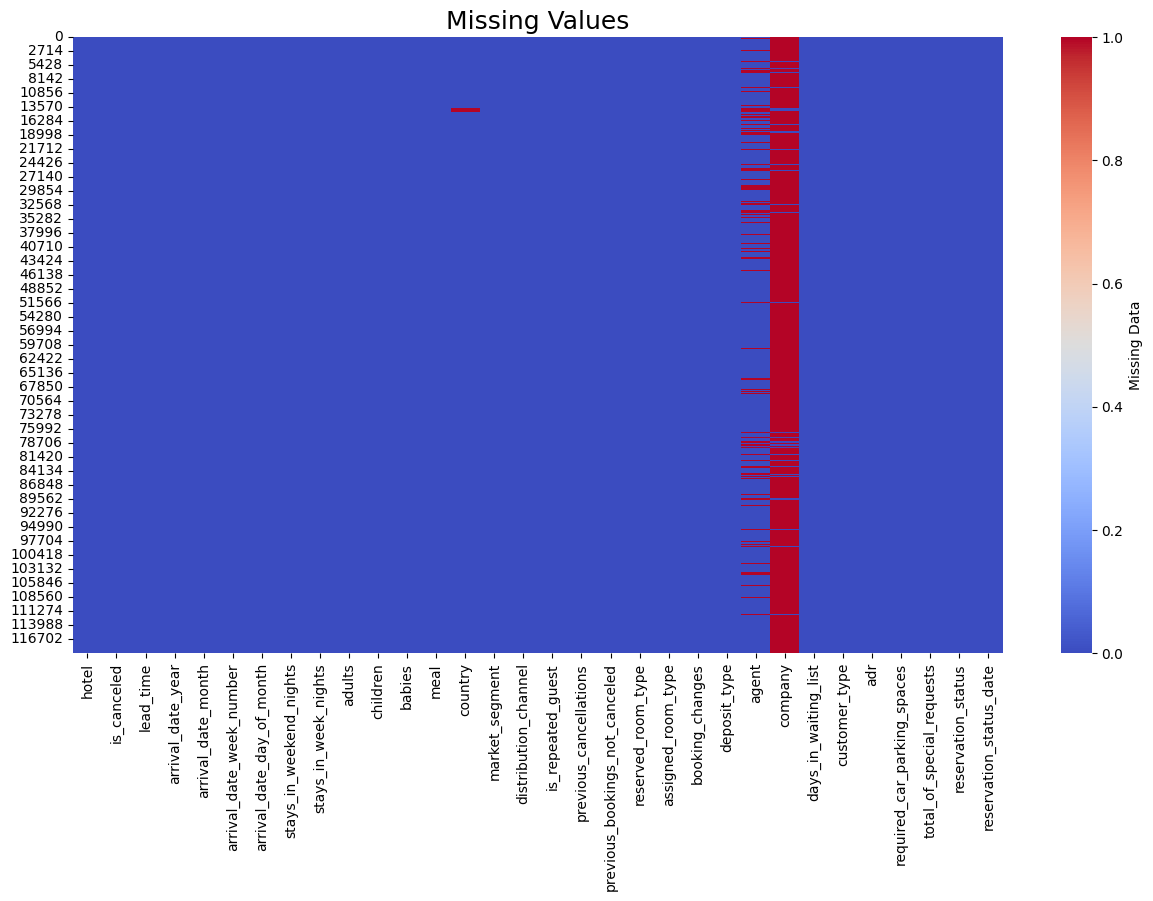

In [63]:
# Visualizing the missing values

plt.figure(figsize=(15,8))
sns.heatmap(df.isna(),
            cmap="coolwarm",
            cbar_kws={'label': 'Missing Data'})

plt.title('Missing Values', fontsize=18)
plt.show()


## ***2. Understanding Your Variables***

In [64]:
# Dataset Columns
df.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [65]:
# Dataset Describe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## ***2. Variables Description***

**hotel**: Type of hotel (City Hotel or Resort Hotel)  
**is_canceled**: Booking cancellation status (1 = Canceled, 0 = Not Canceled)  
**lead_time**: Number of days between booking and arrival  
**arrival_date_year**: Year of arrival date  
**arrival_date_month**: Month of arrival date  
**arrival_date_week_number**: Week number of arrival date  
**arrival_date_day_of_month**: Day of arrival date  
**stays_in_weekend_nights**: Number of weekend nights (Saturday/Sunday) stayed  
**stays_in_week_nights**: Number of weekday nights stayed  
**adults**: Number of adults in the booking  
**children**: Number of children in the booking  
**babies**: Number of babies in the booking  
**meal**: Type of meal booked (BB = Bed & Breakfast, HB = Half Board, etc.)  
**country**: Country of origin of guests  
**market_segment**: Market segment (e.g., Online TA, Offline TA, Direct)  
**distribution_channel**: Booking distribution channel (Direct, TA/TO, etc.)  
**is_repeated_guest**: 1 if guest has booked before, 0 otherwise  
**previous_cancellations**: Number of previous cancellations by the guest  
**previous_bookings_not_canceled**: Number of previous non-canceled bookings by the guest  
**reserved_room_type**: Room type reserved by the guest  
**assigned_room_type**: Room type actually assigned  
**booking_changes**: Number of changes made to the booking  
**deposit_type**: Type of deposit (No Deposit, Non Refund, Refundable)  
**agent**: ID of the travel agency that made the booking. If no agency was involved, the value is null.  
**company**: ID of the company that made the booking. If no company was involved, the value is null.  
**days_in_waiting_list**: Number of days booking was on the waiting list  
**customer_type**: Type of customer (Contract, Group, Transient, etc.)  
**adr**: Average Daily Rate (Revenue per occupied room per day)  
**required_car_parking_spaces**: Number of parking spaces required  
**total_of_special_requests**: Number of special requests made by guest  
**reservation_status**: Last status of the booking (Canceled, Check-Out, No-Show)  
**reservation_status_date**: Date of last status update  


### Check Unique Values for each variable.

In [66]:
# Check Unique Values for each variable.
for i in df.columns :
 print(i,':'," ",df[i].unique()[:10].tolist())

hotel :   ['Resort Hotel', 'City Hotel']
is_canceled :   [0, 1]
lead_time :   [342, 737, 7, 13, 14, 0, 9, 85, 75, 23]
arrival_date_year :   [2015, 2016, 2017]
arrival_date_month :   ['July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April']
arrival_date_week_number :   [27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
arrival_date_day_of_month :   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
stays_in_weekend_nights :   [0, 1, 2, 4, 3, 6, 13, 8, 5, 7]
stays_in_week_nights :   [0, 1, 2, 3, 4, 5, 10, 11, 8, 6]
adults :   [2, 1, 3, 4, 40, 26, 50, 27, 55, 0]
children :   [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies :   [0, 1, 2, 10, 9]
meal :   ['BB', 'FB', 'HB', 'SC', 'Undefined']
country :   ['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN']
market_segment :   ['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Complementary', 'Groups', 'Undefined', 'Aviation']
distribution_channel :   ['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS']
is_repeat

## 3. ***Data Wrangling***

### Data Wrangling Code

In [67]:
df1 = df.copy()

In [68]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [69]:
## replacing null values in children column with 0 assuming that family had 0 children
# replacing null values in company and agent columns with 0 assuming those rooms were booked without company/agent

df1['agent'].fillna(0,inplace =True)
df1['company'].fillna(0,inplace =True)
df1['children'].fillna(0,inplace =True)

# replacing null values in country column as 'unknown'
df1['country'].fillna('unknown',inplace =True)

<ipython-input-69-b3abb93b0ec5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['agent'].fillna(0,inplace =True)
<ipython-input-69-b3abb93b0ec5>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

In [70]:
# check fo null values
df1.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [72]:
# dropping rows where no adults , children and babies are available because no bookings were made that day
no_guest = df1[df1['adults']+df1['babies']+df1['children']==0]

# Count the number of such rows
df1.drop(no_guest.index, inplace=True)




## 4. ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

#***Which type of hotel is most preffered by the guests?***

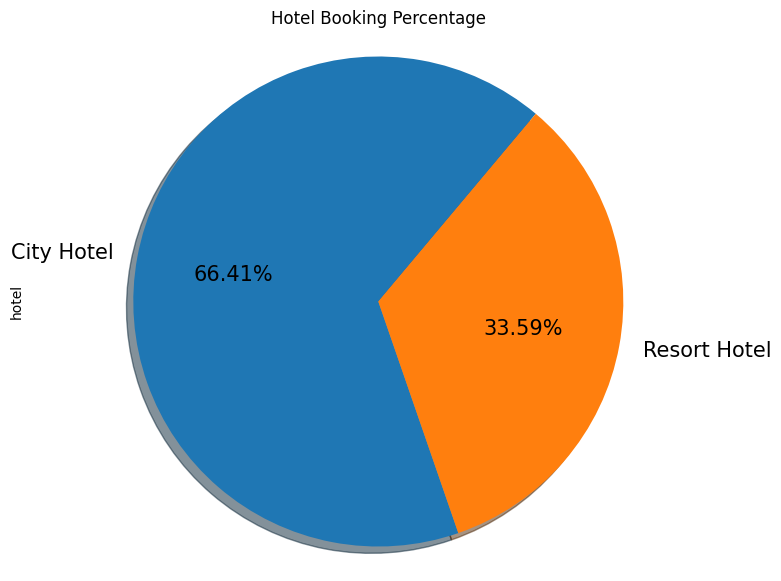

In [73]:
# Chart - count_hotel
# Count the number of bookings for each hotel type
hotel_count= df1.groupby('hotel')['hotel'].count()
# plotting value in pie chart
hotel_count.plot.pie(figsize=(9,7), autopct='%1.2f%%', shadow=True, fontsize=15,startangle=50)
# Setting the title
plt.title('Hotel Booking Percentage')
plt.axis('equal')
plt.show()



##### **1. Why did you pick the specific chart?**

A pie chart is chosen because it visually represents the percentage share of each hotel type in total bookings. Since there are only two categories (City Hotel and Resort Hotel), a pie chart makes it easy to compare their proportions at a glance.


##### **2. What is/are the insight(s) found from the chart?**

 - City Hotels account for 66% of total bookings, while Resort Hotels make up 34%.
 - This indicates that most guests prefer City Hotels, likely for business,
   work-related travel, or short stays.
 - Resort Hotels, making up the remaining 34%, might be preferred by vacationers and leisure travelers.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

 Yes, these insights can help in business decision-making:

City Hotels should focus on business travelers, offering corporate deals and weekday promotions.
Resort Hotels should improve marketing efforts for holiday travelers, family packages, and weekend discounts.
Hotels can adjust pricing strategies based on peak demand periods for each type.
If the goal is to increase Resort Hotel bookings, the business can run targeted promotions during vacation seasons.

#### **Chart** - **2**

#***What is perecentage of hotel booking cancellation?***

<Axes: ylabel='count'>

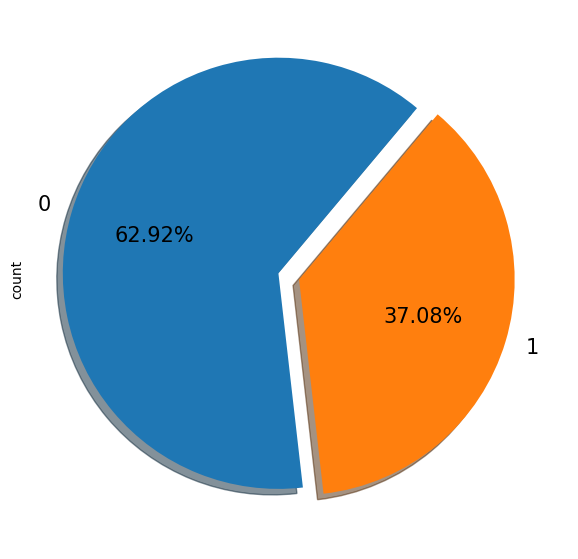

In [74]:
# Chart - 2 visualization cod
cancel_booking = df1['is_canceled'].value_counts()
cancel_booking.plot.pie(figsize=(9,7), autopct='%1.2f%%', shadow=True, fontsize=15,startangle=50,explode=(0.1,0))

##### **1. Why did you pick the specific chart?**

A pie chart was chosen because it effectively displays the proportion of canceled vs. non-canceled bookings as parts of a whole. Since there are only two categories (canceled and not canceled), a pie chart allows for a clear and immediate visual comparison. Additionally, by showing percentages directly on the chart, it helps stakeholders quickly understand the relative impact of cancellations on the overall booking volume.



##### **2. What is/are the insight(s) found from the chart?**

The chart reveals that:

- Approximately 37% of bookings were canceled.
-Around 63% of bookings were successfully completed (not canceled).

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can drive positive business impact if acted upon:

The hotel can implement stricter cancellation policies, such as requiring advance deposits or offering discounts for non-refundable bookings to reduce cancellations.
Marketing campaigns can target reliable customer segments (business travelers, loyal guests) who are less likely to cancel.

#### **Chart - 3**

#***Monthly Booking Trend***

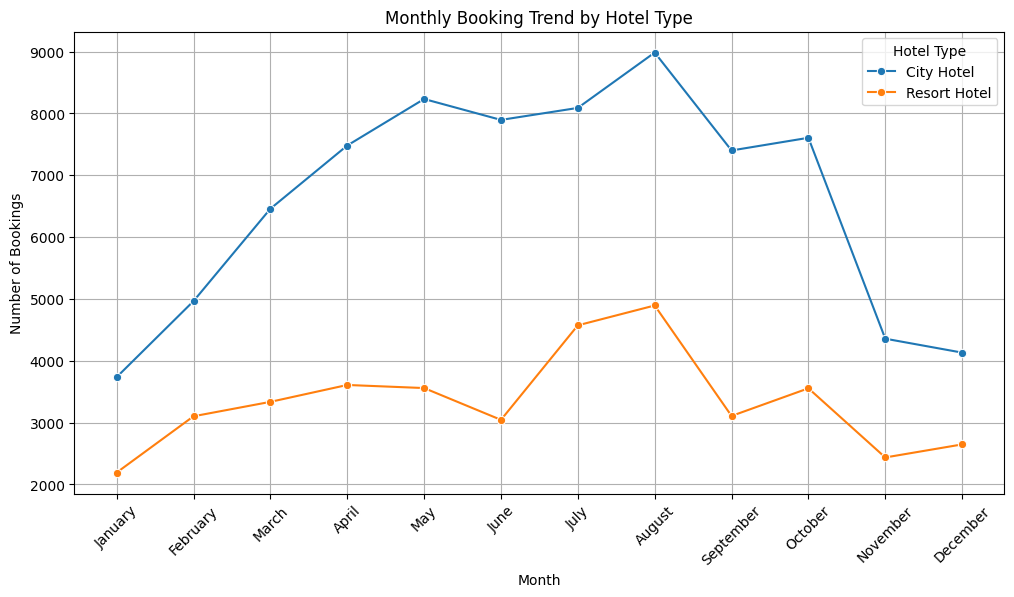

In [75]:
# Define correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Ensure 'arrival_date_month' is categorical and correctly ordered
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

# Group data & create a DataFrame
monthly_trend = df.groupby(['arrival_date_month', 'hotel'],observed=False).size().reset_index(name='count')

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='arrival_date_month', y='count', hue='hotel', marker='o')

plt.title('Monthly Booking Trend by Hotel Type')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title="Hotel Type")
plt.grid(True)
plt.show()



##### **1. Why did you pick the specific chart?**

I picked a Line Plot because it effectively shows trends over time, allowing us to compare how bookings for different hotel types vary month by month.Answer Here.

##### **2. What is/are the insight(s) found from the chart?**

The chart shows that hotel bookings have a seasonal trend, with peak bookings in the summer months (June–August) and a decline in the winter months.

##### **3. Will the gained insights help creating a positive business impact?**


Yes, this insight can positively impact the business. Knowing peak booking periods allows hotels to adjust their pricing, increase staff availability, and optimize marketing efforts. However, the off-season decline might indicate the need for special discounts or promotions to attract guests during those months.

#### **Chart - 4**

#***Lead Time Distribution***

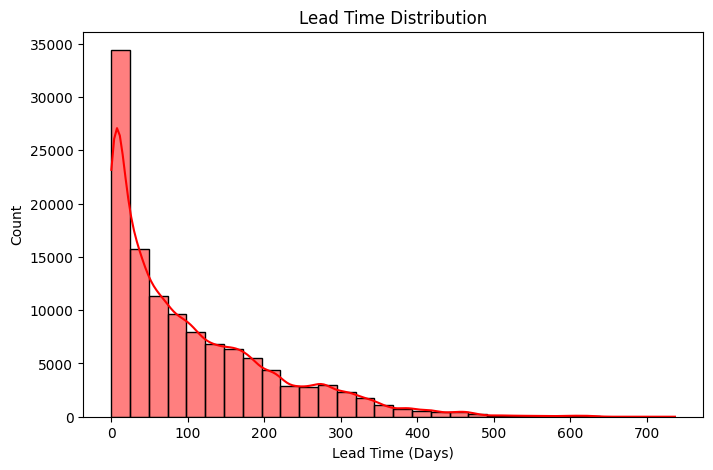

In [76]:
# Chart - 4 visualization code

plt.figure(figsize=(8, 5))
sns.histplot(df1['lead_time'], bins=30, kde=True, color="red")
plt.title("Lead Time Distribution")
plt.xlabel("Lead Time (Days)")
plt.show()


##### **1. Why did you pick the specific chart?**

A histogram is used because it effectively displays the distribution of lead time (days between booking and check-in).

##### **2. What is/are the insight(s) found from the chart?**

Most bookings are made within a short lead time (0–30 days), but some are booked several months in advance.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing lead times helps in pricing strategies. Hotels can offer discounts for early bookings and charge higher rates for last-minute bookings to maximize revenue.Answer Here

#### **Chart - 5**

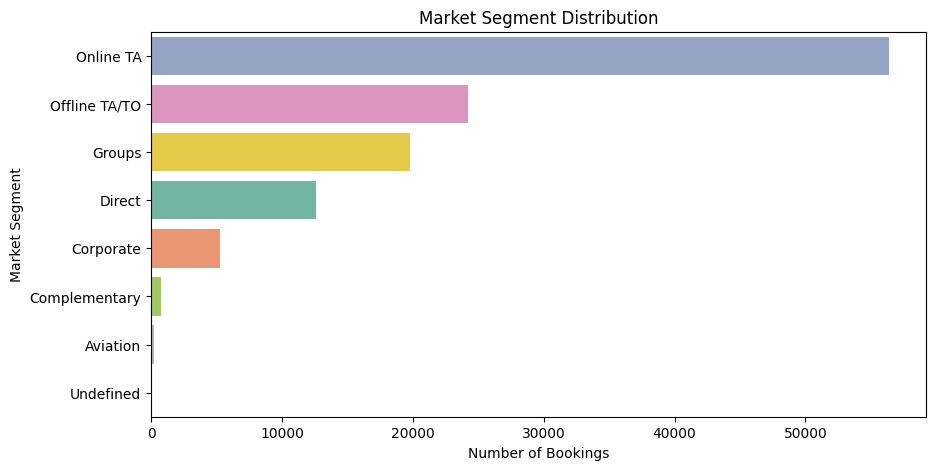

In [77]:
# Chart - 5 visualization code
plt.figure(figsize=(10, 5))
sns.countplot(y="market_segment", data=df1,order=df1["market_segment"].value_counts().index, palette="Set2",hue = 'market_segment')
plt.xlabel("Number of Bookings")
plt.ylabel("Market Segment")
plt.title("Market Segment Distribution")
plt.show()



##### **1. Why did you pick the specific chart?**

A horizontal bar chart was chosen because it effectively displays the distribution of bookings across different market segments. Bar charts are ideal for comparing the size of multiple categories.

##### **2. What is/are the insight(s) found from the chart?**

Online travel agencies contribute the highest number of bookings, followed by offline travel agents and groups. Direct and corporate bookings are much lower, showing reliance on third-party channels.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

These insights help identify top-performing channels, allowing the business to focus on strengthening key partnerships. However, over-dependence on online travel agencies could hurt profitability due to high commission fees, highlighting the need to boost direct bookings.

#### **Chart - 6**

#***Booking Trend by Hotel Type Over Years***

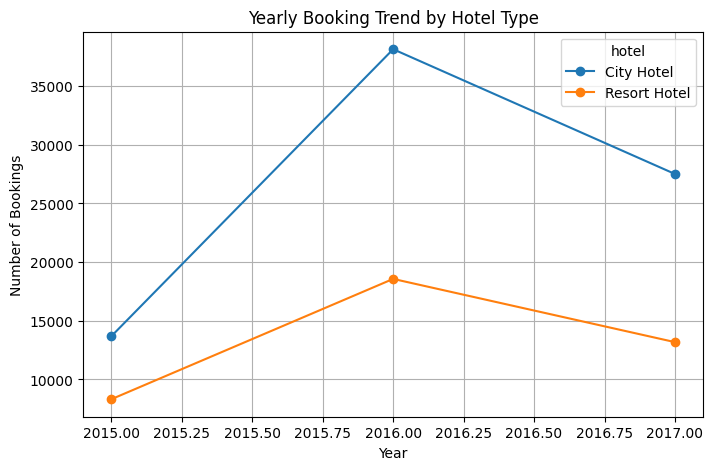

In [78]:
# Chart - 6 visualization code
# Group by year and hotel type
yarly_trend= df.groupby(['arrival_date_year', 'hotel']).size().unstack()
yarly_trend.plot(kind='line', marker='o', figsize=(8, 5))
plt.title("Yearly Booking Trend by Hotel Type")
plt.xlabel("Year")
plt.ylabel("Number of Bookings")
plt.grid(True)
plt.show()

##### **1. Why did you pick the specific chart?**

A Line Plot clearly shows how bookings change over different years.


##### **2. What is/are the insight(s) found from the chart?**

- Peak Bookings in 2016: Both City Hotels and Resort Hotels experienced the highest number of bookings in 2016, with City Hotels peaking significantly higher than Resort Hotels.
- Decline After 2016: Bookings dropped in 2017 for both types of hotels, possibly due to external factors like economic conditions, travel restrictions, or market saturation.
- City Hotels More Popular: City Hotels consistently had more bookings than Resort Hotels in all years, indicating a preference for urban stays over resort accommodations.

##### **3. Will the gained insights help creating a positive business impact?**

Yes, these insights can positively impact business decisions. Hotels can adjust their pricing strategies, staff allocation, and marketing efforts based on peak booking periods. Additionally, understanding the decline after 2016 can help identify potential reasons and implement corrective measures, such as promotions or targeted marketing campaigns.

#### **Chart - 7**

#***Country-wise Bookings (Bar Chart - Top 10 Countries)***

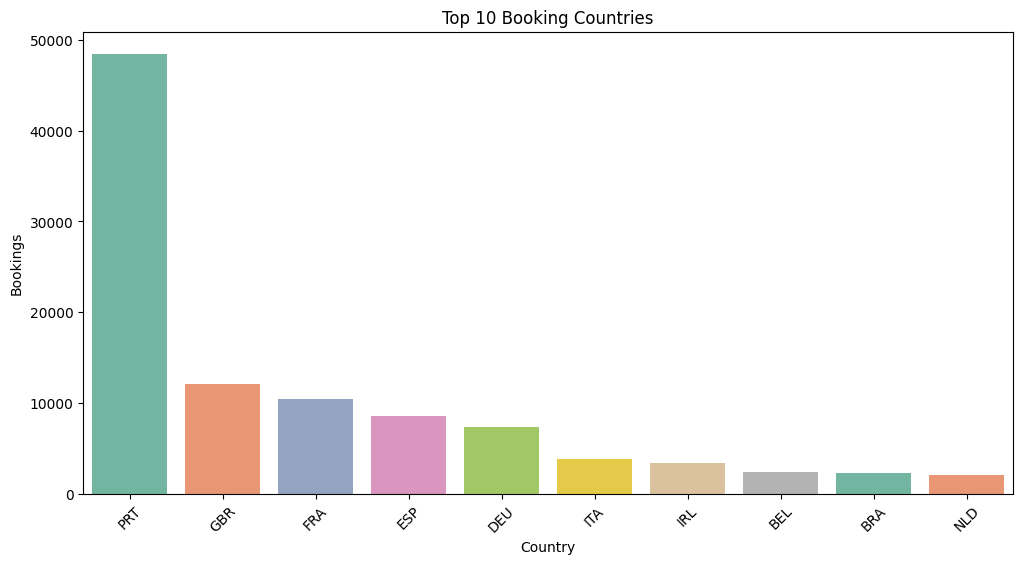

In [79]:
# Chart - 7 visualization code
top_booking_country = df1['country'].value_counts().head(10)

# Convert to DataFrame for Seaborn
top_booking_country_df = top_booking_country.reset_index()
top_booking_country_df.columns = ['Country', 'Bookings']

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top_booking_country_df, x='Country', y='Bookings',palette ='Set2',hue = 'Country')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.title("Top 10 Booking Countries")
plt.show()



##### **1. Why did you pick the specific chart?**

  I picked a Bar Chart because it effectively compares the number of bookings across different countries, making it easy to identify the top contributors to hotel bookings.



##### **2. What is/are the insight(s) found from the chart?**

The chart shows that Portugal (PRT) has the highest number of bookings, followed by the United Kingdom (GBR) and France (FRA). The booking volume decreases significantly after the top few countries.

##### **3. Will the gained insights help creating a positive business impact?**

  Yes, this insight can help hotels focus their marketing efforts on countries with high booking rates. Additionally, for countries with lower bookings, hotels can introduce targeted promotions, partnerships, or localized offers to attract more customers.

#### **Chart - 8**

#***Impact of Deposit Type on Booking Cancellations***

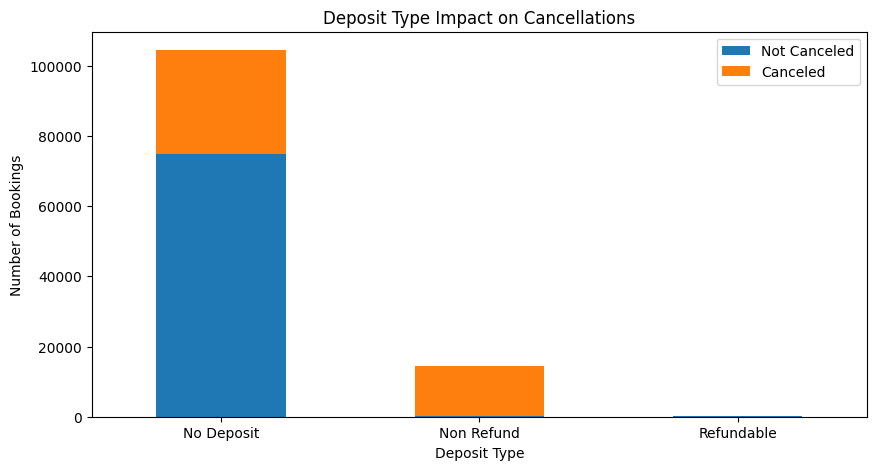

In [80]:
# Get the top 10 countries by booking count
deposit_cancellations = df1.groupby(['deposit_type', 'is_canceled']).size().unstack()

# Plot
deposit_cancellations.plot(kind='bar',stacked =True,figsize=(10,5))

plt.title("Deposit Type Impact on Cancellations")
plt.xlabel("Deposit Type")
plt.ylabel("Number of Bookings")
plt.legend(["Not Canceled", "Canceled"])
plt.xticks(rotation=0)
plt.show()

##### **1. Why did you pick the specific chart?**

A stacked bar chart is ideal to compare the total number of bookings across deposit types while also showing the proportion of cancellations within each deposit type.

##### **2. What is/are the insight(s) found from the chart?**

Most bookings are made with "No Deposit," but this category also sees a significant number of cancellations. Non-refundable bookings have fewer cancellations, indicating that pre-paid bookings discourage cancellations.

**3. Will the gained insights help creating a positive business impact?**

Yes, by encouraging more non-refundable bookings or offering incentives for pre-paid options, hotels can reduce cancellations and improve revenue predictability.

#### **Chart - 9**

#***Country-wise Bookings (Bar Chart - Top 10 Countries)***


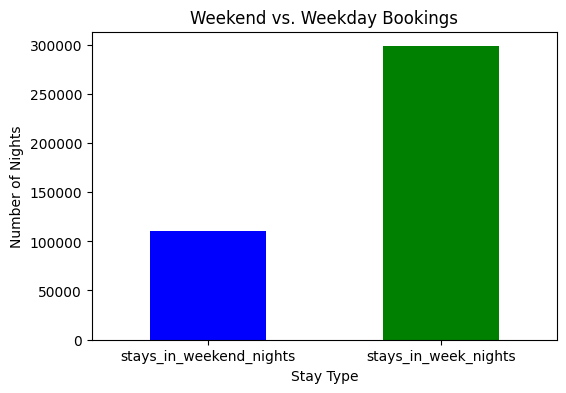

In [81]:
# Counting number of guests from various countries
weekend_bookings = df[['stays_in_weekend_nights', 'stays_in_week_nights']].sum()

plt.figure(figsize=(6, 4))
weekend_bookings.plot(kind='bar', color=['blue', 'green'])
plt.title("Weekend vs. Weekday Bookings")
plt.xlabel("Stay Type")
plt.ylabel("Number of Nights")
plt.xticks(rotation=0)
plt.show()



##### **1. Why did you pick the specific chart?**

A bar chart was chosen because it effectively compares two categories — weekend and weekday stays — in terms of the number of nights. The clear height difference in the bars makes it easy to spot trends.

##### **2. What is/are the insight(s) found from the chart?**



The chart reveals that guests tend to stay more on weekdays than weekends, with weekday bookings significantly higher. This suggests that the majority of guests might be business travelers, who prefer staying during the workweek. Weekend stays are much lower, which may indicate fewer leisure travelers or guests choosing shorter weekend getaways.

**3. Will the gained insights help creating a positive business impact?**

Yes, the insights help hotels plan better promotions. They can target business travelers with weekday deals and create attractive packages for families and vacationers on weekends. This can improve occupancy and revenue.

####**Chart - 10**

#***Which type of meal is most preffered by guests?***

Text(0, 0.5, 'Count')

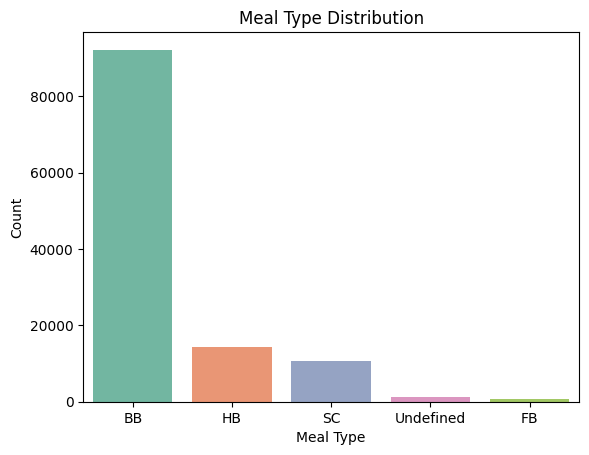

In [82]:
# Chart - 10 visualization code
# Counting each meal type
meal_count = df1['meal'].value_counts().reset_index()
meal_count.columns = ['meal', 'count']
sns.barplot(x = 'meal',y='count',data=meal_count,palette="Set2",hue = 'meal')
plt.title('Meal Type Distribution')
plt.xlabel('Meal Type')
plt.ylabel('Count')



##### 1. Why did you pick the specific chart?

A bar chart can effectively visualizes the distribution of meal types in the dataset. It allows us to compare the popularity of different meal plans easily.

#####2. What is/are the insight(s) found from the chart?

- BB (Bed & Breakfast) is the most preferred meal type, with significantly more bookings than other options.
-HB (Half Board) and SC (Self Catering) have moderate demand compared to BB.
-FB (Full Board) and Undefined meal types are the least preferred.

3. Will the gained insights help creating a positive business impact?

Yes, from the gained insight above now stakeholders know that BB(Bed and Breakfast) is most preferred meal type so they can arrange raw material for this meal in advance and deliver the meal without any delay.

#### Chart - 11

#***Adr across different months***

Text(0, 0.5, 'ADR')

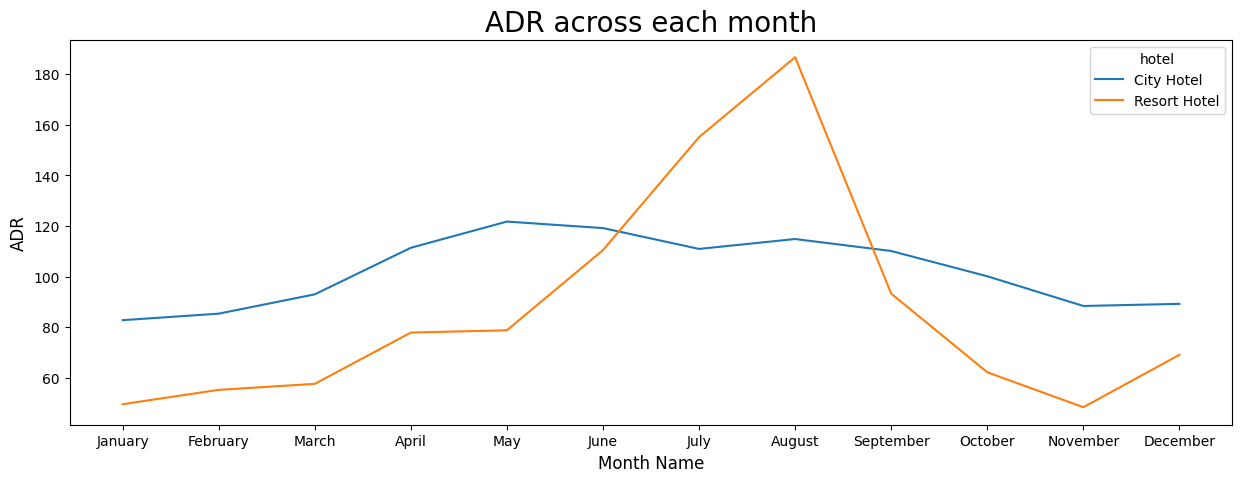

In [83]:
# Grouping arrival_month and hotel on mean of adr
bookings_months=df1.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()

# Creating a month list to order the months in ascending
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating a dataset of months, hotel and their adr
bookings_months['arrival_date_month']=pd.Categorical(bookings_months['arrival_date_month'],categories=months,ordered=True)

# Sorting the months
bookings_months=bookings_months.sort_values('arrival_date_month')

# Setting the chart size
plt.figure(figsize=(15,5))

# Plotting the values in a line chart
sns.lineplot(x=bookings_months['arrival_date_month'],y=bookings_months['adr'],hue=bookings_months['hotel'])

# Setting the labels and title
plt.title('ADR across each month', fontsize=20)
plt.xlabel('Month Name', fontsize=12)
plt.ylabel('ADR', fontsize=12)

1. Why did you pick the specific chart?

A line chart is an effective way to visualize trends in ADR (Average Daily Rate) over time. Since ADR fluctuates across different months, a line chart helps in identifying seasonal patterns, peaks, and dips. Additionally, using different lines for City Hotel and Resort Hotel allows for an easy comparison of their performance throughout the year.



3. Will the gained insights help creating a positive business impact?

- Resort Hotel sees a sharp increase in ADR during June-August, peaking in August, indicating high seasonal demand.
-City Hotel maintains a relatively stable ADR throughout the year, with a slight peak around March-May.
-Resort Hotel experiences a significant drop in ADR from September to November, likely due to lower tourist demand in the offseason.

#####2. What is/are the insight(s) found from the chart?

Yes, these insights can drive key business decisions:

- Revenue Optimization: Higher ADR in peak months suggests an opportunity to maximize profits through premium pricing.
-Seasonal Promotions: Discount strategies or bundled offers can be introduced during low-demand months (September-November) to attract more guests.
-Staff & Inventory Management: Hotels can align staffing levels and resources based on ADR trends to reduce operational costs.
-Marketing Strategies: More aggressive promotions and advertising should be targeted for the peak season, while special offers can be created for the offseason to maintain steady occupancy

#### Chart - 12

#***Which distribution channel has highest adr?***

Text(0.5, 1.0, 'ADR across each distribution channel')

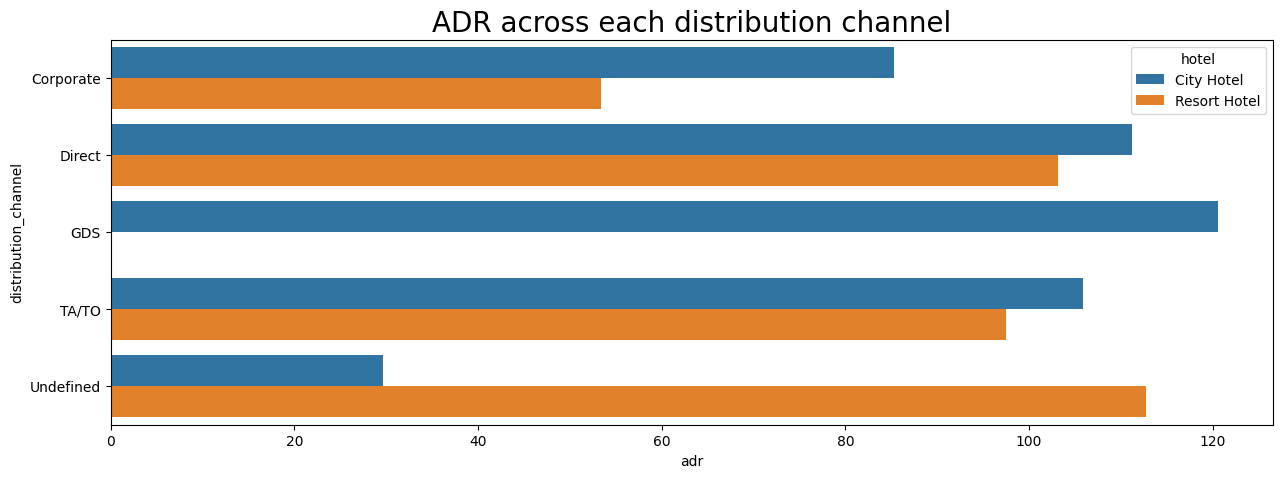

In [84]:
# Grouping distribution channel and hotels on their adr
distribution_adr = df1.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()
# figure size
plt.figure(figsize=(15,5))
sns.barplot(x= 'adr',y = 'distribution_channel',data = distribution_adr,hue = 'hotel')

# Setting the title
plt.title('ADR across each distribution channel', fontsize=20)


####1. Why did you pick the specific chart?

A horizontal bar chart is used because it effectively compares the ADR (Average Daily Rate) across different distribution channels. Since there are multiple categories (Corporate, Direct, GDS, TA/TO, Undefined), a bar chart makes it easy to see variations in ADR for both City Hotel and Resort Hotel.

#####2. What is/are the insight(s) found from the chart?

- City Hotel has the highest ADR in the GDS (Global Distribution System) channel, suggesting that bookings through travel agencies or corporate systems are more expensive.
- Resort Hotel has the highest ADR in the Undefined channel, indicating a unique booking source with premium pricing.
-Direct bookings (where customers book directly with the hotel) show strong ADR for both hotel types.
-Corporate bookings have lower ADR, especially for the Resort Hotel, meaning corporate clients might be receiving discounted rates.

3. Will the gained insights help creating a positive business impact?

Yes, these insights can help in multiple ways:

- Revenue Strategy: Hotels can optimize pricing by focusing on high-ADR channels (like GDS for City Hotel and Undefined for Resort Hotel).
-Marketing Focus: More promotions or discounts can be introduced for lower ADR channels (e.g., Corporate bookings for Resort Hotel).
-Distribution Strategy: Hotels can negotiate better deals with Travel Agents (TA/TO) and optimize their direct booking strategies to maximize revenue.
-Customer Segmentation: The hotel can analyze why certain channels have higher ADR and use targeted marketing to attract high-paying customers.

#### Chart - 13

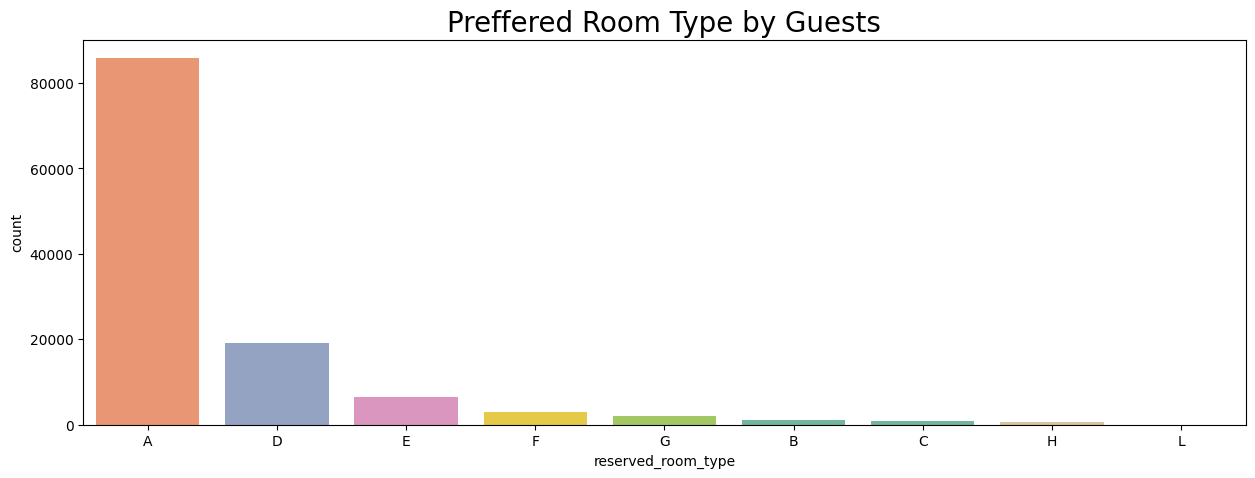

In [85]:

# Chart - 8 visualization code
# Setting the figure size
plt.figure(figsize=(15,5))

# Plotting the values in chart
sns.countplot(x=df1['reserved_room_type'],order=df1['reserved_room_type'].value_counts().index,palette = 'Set2',hue=df1['reserved_room_type'] )

# Setting the title
plt.title('Preffered Room Type by Guests', fontsize = 20)

# Show the chart
plt.show()

####1. Why did you pick the specific chart?


A bar chart is ideal for visualizing categorical data like room type preferences. It helps in easily comparing the popularity of different room types among guests.

#####2. What is/are the insight(s) found from the chart?

- room type "A" is the most preferred by a large margin.
- Room type "D" is the second most booked, but far behind room type "A".
- Other room types (E, F, G, B, C, H, P, L) have significantly lower demand.

3. Will the gained insights help creating a positive business impact?

Yes, these insights can help businesses in the following ways:

- Hotels can allocate more resources (e.g., staff, cleaning services) to maintain room type "A" efficiently.
-Dynamic pricing strategies can be applied, such as increasing the price of highly preferred rooms during peak seasons.
-Less preferred rooms can be offered at discounts or included in promotional packages to increase occupancy.

####Chart - 14


     

#Correlation Heatmap

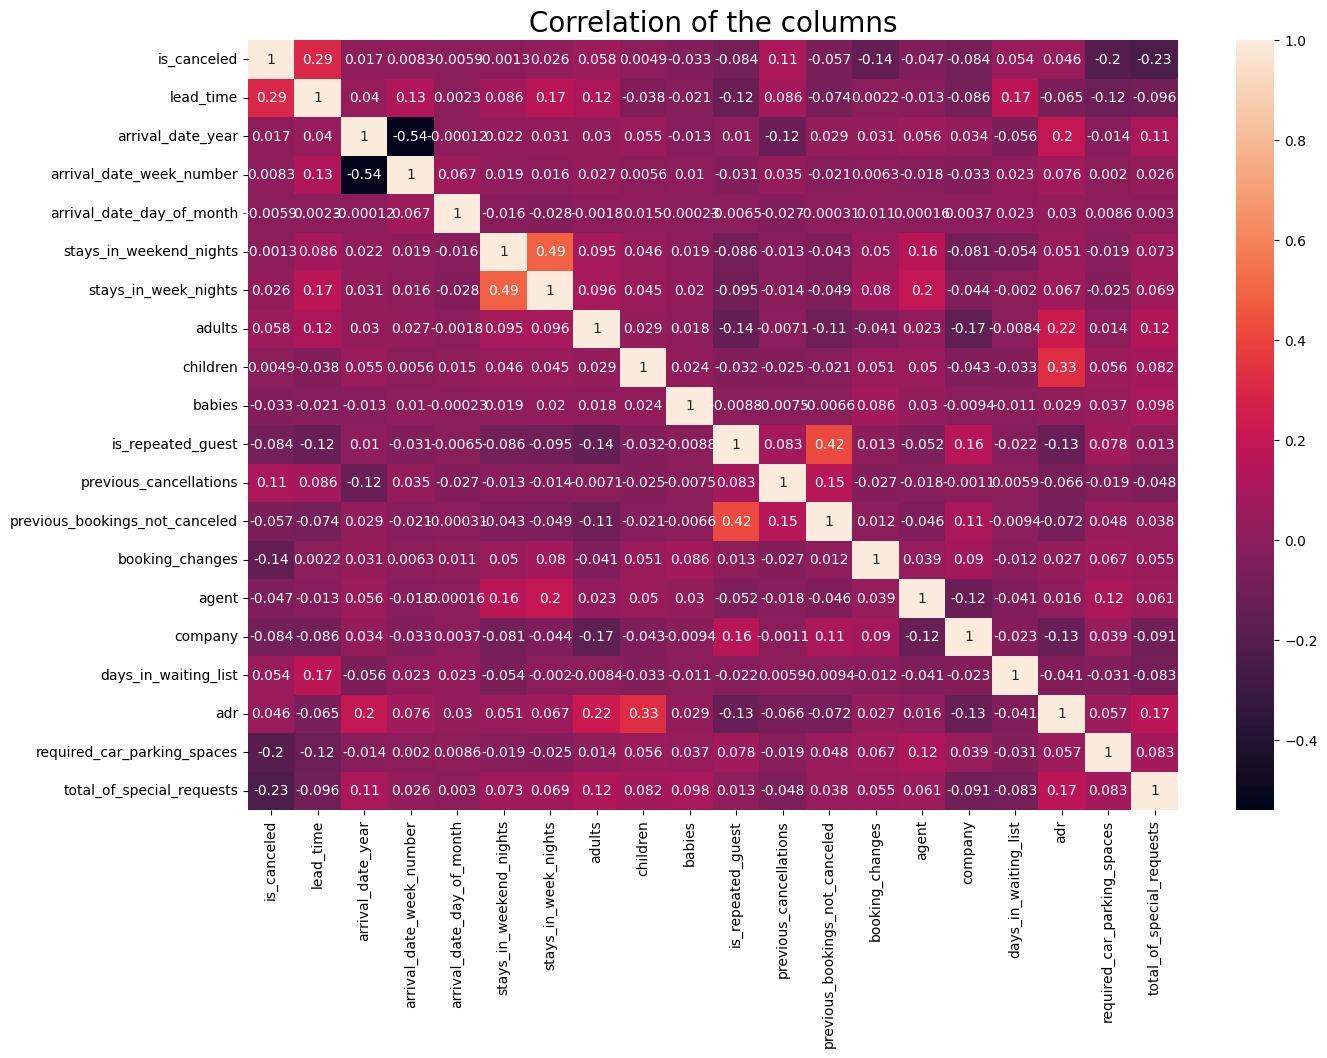

In [86]:

# Correlation Heatmap visualization code
# Setting the chart size
plt.figure(figsize=(15,10
                    ))

# Creating heatmap to see correlation of each columns
sns.heatmap(df1.corr(numeric_only=True),annot=True)          # Setting the numeric only colun to True to avoid warning

# Setting the title
plt.title('Correlation of the columns', fontsize=20)

# Show heatmap
plt.show()


####1. Why did you pick the specific chart?

I chose the correlation heatmap because it helps visualize relationships between numerical variables in a clear and intuitive way, making it easier to spot patterns. From the chart, I found that longer lead times and previous cancellations slightly increase the chances of cancellation, while repeated guests and those with more special requests are less likely to cancel. These insights help understand customer behavior and identify factors that influence booking cancellations.









2. What is/are the insight(s) found from the chart?

Some key insights from this heatmap include:

- is_canceled and lead_time have a moderate positive correlation (~0.29) — This suggests that the longer the lead time (time between booking and arrival), the more likely a booking is to be canceled.
-is_repeated_guest has a weak negative correlation with is_canceled (~-0.084) — Meaning repeated guests are slightly less likely to cancel their bookings.
-previous_cancellations has a positive correlation (~0.12) with is_canceled — Customers who canceled bookings in the past are more likely to cancel again.
-total_of_special_requests has a weak negative correlation (~-0.23) with is_canceled — Guests with more special requests tend to cancel less, possibly indicating more serious intent to stay.


####Chart - 15

#Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(df1)
plt.show()



#Solution to Business Objective

- Resort Hotel is the most preferred, so stakeholders can offer discounts on City Hotels to attract more bookings.
- Around 27.52% of bookings are canceled, so the hotel can offer loyalty discounts to guests who don’t cancel their bookings.
- BB (Bed and Breakfast) is the most preferred meal type, so the hotel can maintain raw materials in advance to avoid delays.
- City Hotels have higher waiting times, so the hotel should increase the number of rooms to reduce waiting periods.
- TA (Travel Agents) contribute the most bookings, so the hotel could run offers to attract bookings from other market segments.
- Room Type A is the most preferred, so the hotel should increase the number of rooms of this type.
- The number of repeated guests is low, indicating some dissatisfaction, which the hotel should address to improve guest retention.
- City Hotels are much busier than Resort Hotels, reflected in the higher waiting periods at City Hotels.
- Most guests stay for less than 7 days, so the hotel could improve services to encourage longer stays.
- Maximum guests were from Portugal, so the hotel could run country-specific campaigns to attract more international guests.

#Conclusion

The analysis of hotel booking data highlights key areas where the hotel can improve operations and enhance guest satisfaction. By offering targeted discounts, improving room availability in City Hotels, maintaining stock for popular meal types, and addressing factors contributing to cancellations and low repeat guest rates, the hotel can increase bookings, reduce cancellations, and improve overall guest experience. Focusing on these insights will help the hotel make data-driven decisions to optimize performance and revenue.